<a name="début"></a>

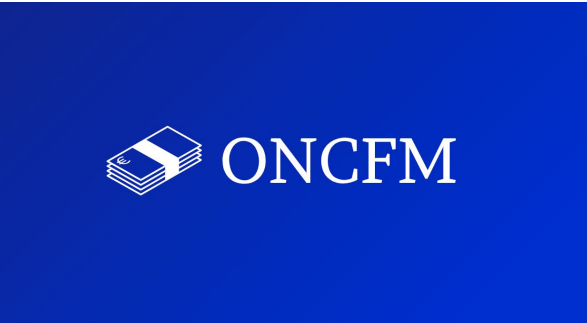

# Projet 10
# Détectez des faux billets



<a name="p9000"></a>

<ul>
    <li> <a href=#p9101>I. Importer les bibliothèques et les fonctions. </a></li>
    <li> <a href=#p9102>II.  Impoter les fichiers dans un dataframe. </a></li> 
    <li> <a href=#p9103>III.  création des varibles esplicative et target. </a></li>
    <li> <a href=#p9105>IV. Modélisation. </a></li>
    <li> <a href=#p9105>IV.1 ___________clustering. </a></li>
    <li> <a href=#p91052>IV.2 ___________régression logistique </a></li>
    <li> <a href=#p91053>IV.3 ___________Random Forest </a></li>
    <li> <a href=#p9106>V. Détermination de faux de billets.  </a></li>
    </li>
         
</ul>

 <a href=#NB>NB.  Convention d'écriture pep 8. </a>

<a name="p9101"></a>

<h6><i> I. Importer les bibliothèques. </i></h6>

In [189]:
# ==========================================================    
# on importe les Bibliotéques panda et le fichier fonction
#
#                            ~oOo~
# ==========================================================           

%pylab inline
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

from sklearn import preprocessing, metrics, cluster, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV#, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')


def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)



Populating the interactive namespace from numpy and matplotlib


<a href=#p9000>Menu principal. </a>

<a name="p9102"></a>

<h6><i> II.  Impoter les fichiers dans un dataframe. </i></h6>

In [190]:
# ==========================================    
#   on importe les fichiers dans un dataframe
#
#                 ~oOo~
# ==========================================      

#import data

billets = pd.read_csv('C:/Users/pjani/Documents/projet 10/data/billets_nettoye.csv')



In [191]:
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


<a href=#p9000>Menu principal. </a>

<a name="p9103"></a>

<h6><i>III.  création des varibles esplicatives et target. </i></h6>

In [192]:
# Variables explicatives
X=pd.DataFrame(billets.iloc[:,1:])

# Variable à expliquer
y=pd.DataFrame(billets.iloc[:,0])

<a href=#p9000>Menu principal. </a>

<a name="p9105"></a>

<h6><i> IV. Modélisation </i></h6>

<h6><i> IV.1 _____clustering </i></h6>

In [193]:
#===============================
# l'algorithme du kmeans
#
#         ~oOo~
# ===============================

# appartenant à la famille des méthodes non-supervisé, l'algorithme du kmeans associe les points au cluster 
# en fonction de leur distance avec leur centroides.


Text(0, 0.5, 'cout du model')

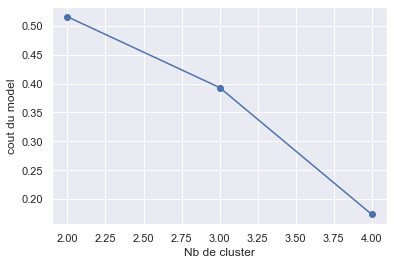

In [194]:
#déterminant de "silhouette"
silhouettes2= []
for num_cluster2 in range (2,5):
    cls2=cluster.KMeans(n_clusters=num_cluster2)
    cls2.fit(X.values)
    silh2=metrics.silhouette_score(X.values,cls2.labels_)
    silhouettes2.append(silh2)
plt.plot(range (2,5),silhouettes2,marker='o')
plt.xlabel("Nb de cluster")
plt.ylabel("cout du model")


<p> le coefficient de silhouette decroit à partir de 2 clusters, 
on choisit 2 comme nombre de cluster</p>

In [195]:
#on créer le modèle
mdl_kmeans=cluster.KMeans(n_clusters=2,
                          random_state=0
                         ).fit(X.values)

clusters1 = mdl_kmeans.labels_
#print (f"clusters1:\n{clusters1}")

# On récupère les labels des clusters des individus
# on a toujours le même problème pour fixer les labels des clusters. le label 1 correspond à True ou à False ???
# fixer true avec le label 1

# si le premier élément des listes "is_genuine" et "clusters1"
# sont inversés (True =0 ou False =1) alors on inverse label
# pour obtenir True=1 et False=0

def inversseur(a):
    if a == 0 :return 1
    return 0


label=clusters1
if (y["is_genuine"][0] == True) & (clusters1[0] == 0):label=map(inversseur,clusters1)
if (y["is_genuine"][0] == False) & (clusters1[0] == 1):label=map(inversseur,clusters1)

label1=list(label)

#On récupère les centroides des valeurs centrées
centroide_ctr = mdl_kmeans.cluster_centers_



# prédict renvoie le label des centroides, les centroides 
# sont affichée par ordre croissant comme la liste des labels
# predict n'a pas d'intéret 
#centro_ctr=model1.predict(centroide_ctr)


# on créer un data frame des cluster de billets

cls_kmeans1 = pd.DataFrame({"cluster": label1, 
                            "TRUE/FALSE": y["is_genuine"].values 
                           }
                          )

print (cls_kmeans1)


      cluster  TRUE/FALSE
0           1        True
1           1        True
2           1        True
3           1        True
4           1        True
...       ...         ...
1495        0       False
1496        0       False
1497        0       False
1498        0       False
1499        0       False

[1500 rows x 2 columns]


In [196]:
# Matrice de confusion
cm = confusion_matrix(y["is_genuine"].values, 
                      label1
                     )

# Assignation du nom des colonnes
cm_df = pd.DataFrame(cm,
                     columns = ['Predicted Faux','Predicted Vrai'],
                     index = ['False', 'True']
                    )
cm_df



,Predicted Faux,Predicted Vrai
False,481,19
True,2,998


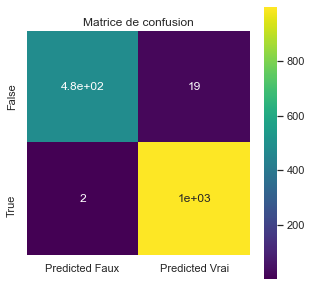

In [197]:
#on fait un heatmap

sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm_df,cmap = 'viridis',cbar = True,square = True, annot=True)
plt.title("Matrice de confusion")
plt.show()

In [198]:
# Evaluation du modèle
print(classification_report(y["is_genuine"].values,
                            label1
                           )
     )

print("le score du modèle est de:",accuracy_score(y["is_genuine"].values, label1)*100,"%")

              precision    recall  f1-score   support

       False       1.00      0.96      0.98       500
        True       0.98      1.00      0.99      1000

    accuracy                           0.99      1500
   macro avg       0.99      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500

le score du modèle est de: 98.6 %


<a href=#p9000>Menu principal. </a>

<a name="p91052"></a>

<h6><i>IV.2 _____ regression logistique </i></h6>

In [199]:
#===============================
# regression logistique 
#
#         ~oOo~
# ===============================

# appartenant à la famille des méthodes supervisées, la regression logistique malgrè son nom est un classificateur 
# et non une regression. Dans le cas de deux classes elle est dit "binaire". 
# dans un premier temps on créé une fonction linéaire en fonction des variables, puis on l'aplique aux résultats obtenus 
# pour obtenir une sortis 0 ou 1.

In [200]:
# Partition aléatoire du jeu de données en 80% pour créer le modèle, 20% pour tester le modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [201]:
# Régression logistique
mdl_logiRegre = LogisticRegression()
mdl_logiRegre.fit(X_train, y_train)


LogisticRegression()

In [202]:
# Stockage de prédictions
y_pred = mdl_logiRegre.predict(X_test)


In [203]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Assignation du nom des colonnes
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Faux','Predicted Vrai'],
            index = ['False', 'True'])
cm_df

,Predicted Faux,Predicted Vrai
False,109,1
True,2,188


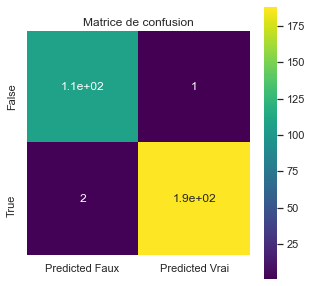

In [204]:
#on fait un heatmap

sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm_df,cmap = 'viridis',cbar = True,square = True, annot=True)
plt.title("Matrice de confusion")
plt.show()

In [205]:
# Evaluation du modèle
print(classification_report(y_test, y_pred))
print("le score du modèle est de:",round(accuracy_score(y_test,y_pred)*100,2),"%")

              precision    recall  f1-score   support

       False       0.98      0.99      0.99       110
        True       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

le score du modèle est de: 99.0 %


<a href=#p9000>Menu principal. </a>

<a name="p91053"></a>

<h6><i>IV.3 _____ Random Forest </i></h6>

In [206]:
#===============================
# Random Forest 
#
#         ~oOo~
# ===============================

# appartenent à la famille des méthodes assemblistes de type "bagging". le principe est de créer des multitudes d'arbre 
# sur des sous-ensembles de données. lors d'une  prediction, la moyenne des predictions de chaque arbre est renvoyées. 

In [207]:
# Création du classificateur et construction du modèle sur les données d'entraînement
mdl_rdFstClsf = ensemble.RandomForestClassifier() 
mdl_rdFstClsf.fit(X_Value_scaled, y_train)

param_grid={'min_samples_split': [(i) for i in range (2,30,2)],
            'max_features': ['sqrt', 'log2']}

grid= GridSearchCV (mdl_rdFstClsf, 
                    param_grid=param_grid,
                    cv=5
                    )

grid.fit(X_train,y_train)

print("best_estimator:",grid.best_estimator_)
print("best_params:",grid.best_params_)


gridBest=grid.best_estimator_
print("best_score:",round(gridBest.score(X_test,y_test)*100,2),"%")

bestRdFstClsf=grid.best_estimator_

best_estimator: RandomForestClassifier(max_features='log2', min_samples_split=12)
best_params: {'max_features': 'log2', 'min_samples_split': 12}
best_score: 99.33 %


In [208]:
# Stockage de prédictions
y_pred = bestRdFstClsf.predict(X_test)
#print("le score du modèl est de:",mdl_logiRegre.score(X_test,y_test)*100,"%")



In [209]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Assignation du nom des colonnes
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Faux','Predicted Vrai'],
            index = ['False', 'True'])
cm_df

,Predicted Faux,Predicted Vrai
False,109,1
True,1,189


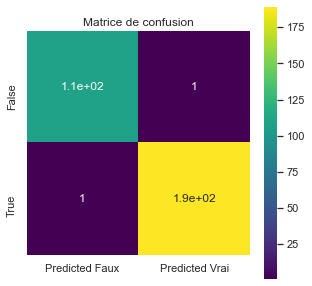

In [210]:
#on fait un heatmap

sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(cm_df,cmap = 'viridis',cbar = True,square = True, annot=True)
plt.title("Matrice de confusion")
plt.show()

In [211]:
# Evaluation du modèle
print(classification_report(y_test, y_pred))
print("le score du modèle est de:",round(accuracy_score(y_test,y_pred)*100,2),"%")

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       110
        True       0.99      0.99      0.99       190

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

le score du modèle est de: 99.33 %


#### Avec un score suppérieur, on sélection le random forest pour déterminer les faux billets. 

<a href=#p9000>Menu principal. </a>

<a name="p9106"></a>

<h6><i>V. Détermination de faux de billets. </i></h6>

In [212]:
liasse = pd.read_csv('C:/Users/pjani/Documents/projet 10/data/billets_production.csv')

In [213]:
liasse

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [214]:
X=pd.DataFrame(liasse.iloc[:,:-1])

In [215]:
liasse["is_genuine"] = bestRdFstClsf.predict(X)

probat=bestRdFstClsf.predict_proba(X)
probat = pd.DataFrame(probat)
probat = round(probat,2)*100 
probat = probat.rename(columns= {0 : '% Faux', 1 : '% Vrai'})

liasse = pd.concat([liasse,probat],axis=1)


In [216]:
liasse

,diagonal,height_left,height_right,margin_low,margin_up,length,id,is_genuine,% Faux,% Vrai
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,False,98.0,2.0
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,False,100.0,0.0
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,False,100.0,0.0
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,True,6.0,94.0
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,True,0.0,100.0


<h6><i>Visualisation. </i></h6>

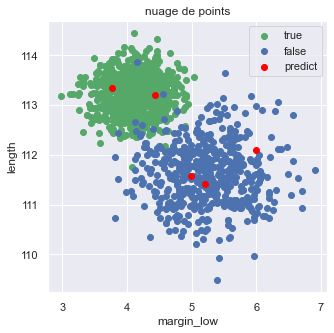

In [217]:
# on visualise la prediction: margin_low/length
fig, ax = plt.subplots()

margin_lowTrue=billets[billets["is_genuine"]== 1]["margin_low"].values
lengthTrue=billets[billets["is_genuine"]== 1]["length"].values

margin_lowFalse=billets[billets["is_genuine"]== 0]["margin_low"].values
lengthFalse=billets[billets["is_genuine"]== 0]["length"].values

margin_low=liasse["margin_low"].values
length=liasse["length"].values

#le graphique
plt.scatter(margin_lowTrue,lengthTrue,c="g",label="true")
plt.scatter(margin_lowFalse,lengthFalse,c="b",label="false")
plt.scatter(margin_low,length,c="red",label="predict")
ax.set_title("nuage de points")
ax.set_xlabel("margin_low")
ax.set_ylabel("length")
plt.legend()

<a href=#début>Retour au code. </a>

<h6><i>NB. Convention d'écriture PEP 8</i></h6><a name="NB"></a>

<p>
    Une indentation sera utilisée dès le deuxième paramètre ou condition                                                           Une indentation sera utilisée dès le deuxième enchènement de méthode 

ex . print("les valeurs à contrôler",
            "\n",
            calculCa4
          )

. calculCa4=calculCa2[calculCa2.price>=outlet_supp
                     ].drop(columns={"total_sales",
                                     "ca"
                                    }
                            )
    
 </p>

<a href=#début>Retour au code. </a>